<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

# 02 - Uso de Jupyter Notebook: Magic Functions, comandos de consola, documentación, testing y lectura de datos

<figure><center>
  <img src="https://jupyter.org/assets/homepage/main-logo.svg" alt="jupyter.org" width=150 height=150/>
  <figcaption>jupyter.org</figcaption>
</figure><center>

## Funciones mágicas

Las celdas de código de Jupyter Notebook pueden contener comandos especiales que no son código de Python válido pero que pueden mejorar el desempeño del cuaderno. A estos comandos se les conoce como funciones o comandos mágicos.

Estos comandos comenzarán con  `%` o `%%` y recordemos que **no funcionarán fuera de un notebook.**

El comando `%lsmagic` lista los comandos mágicos disponibles. Por su parte  `%magic` los lista y describe su funcionalidad con ejemplos. Para saber lo que hace uno de estos comandos se puede usar `?` al final de este.

In [1]:
# Listar los comandos mágicos disponibles.
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [2]:
# Este comando mágico muestra una introducción a los comandos mágicos
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

### Comandos mágicos más útiles

#### Rendimiento (timeit, time, ...)

Vamos a crear una función de python llamada `factorial` que calcula el [factorial](https://es.wikipedia.org/wiki/Factorial) de un número. Lo haremos para medir cuánto tarda en ejecutarse la función.

In [3]:
def factorial(n):
    # Función recursiva porque se llama a sí misma
    if n <= 1:
        return 1
    
    return n * factorial(n-1)

Vamos a comprobar su funcionamiento...

In [4]:
factorial(5)

120

In [5]:
5 * 4 * 3 * 2 * 1

120

Si usamos `time` mediremos el tiempo que tarda en ejecutarse. Hay dos tipos de mediciones de tiempo:

- **Wall time**: tiempo de "reloj de pared". Tiempo real que pasa desde que comienza a ejecutarse hasta que finaliza.
- **CPU time**: tiempo que la CPU está siendo utilizada para realizar los cálculos necesarios. No tiene que coincidir con el *wall time* por dos motivos: 1) a veces se realizan operaciones que no consumen CPU como por ejemplo esperar a que se descargue un fichero de internet; 2) con procesadores multinúcleo si el proceso se ejecuta en varios *cores* el CPU time será superior al wall time [(explicación)](https://stackoverflow.com/questions/58998202/does-multithreading-increase-cpu-time) 

In [6]:
%%time
factorial(500)

CPU times: user 476 µs, sys: 66 µs, total: 542 µs
Wall time: 548 µs


1220136825991110068701238785423046926253574342803192842192413588385845373153881997605496447502203281863013616477148203584163378722078177200480785205159329285477907571939330603772960859086270429174547882424912726344305670173270769461062802310452644218878789465754777149863494367781037644274033827365397471386477878495438489595537537990423241061271326984327745715546309977202781014561081188373709531016356324432987029563896628911658974769572087926928871281780070265174507768410719624390394322536422605234945850129918571501248706961568141625359056693423813008856249246891564126775654481886506593847951775360894005745238940335798476363944905313062323749066445048824665075946735862074637925184200459369692981022263971952597190945217823331756934581508552332820762820023402626907898342451712006207714640979456116127629145951237229913340169552363850942885592018727433795173014586357570828355780158735432768888680120399882384702151467605445407663535984174430480128938313896881639487469658817504506926365338175

Normalmente cuando queramos tener una medición más exacta usaremos timeit que ejecuta la fucnión múltiples veces y promediará los tiempos de ejecución. De esta manera eliminamos el efecto de factores que pueden afectar (otros procesos ejecutando, ...).

In [7]:
%%timeit
factorial(500)

87.4 µs ± 4.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


time y timeit son dos utilidades sencillas para medir el rendimiento de forma fácil dentro de un notebook. Para hacer análisis de rendimiento más detallado se recurren a otras herramientas de **profiling** [(herraminetas de profiling)](https://docs.python.org/3/library/profile.html)

Vamos a hacer otro ejemplo de una función que **duerme** (no usa CPU pero tarda en finalizar)

In [8]:
import time

def funcion_pesada(n):
    time.sleep(n)

In [9]:
%%time
funcion_pesada(5)

CPU times: user 2.07 ms, sys: 27 µs, total: 2.1 ms
Wall time: 5 s


In [10]:
%%timeit
factorial(500)

84.4 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Podemos ver que el wall time es elevado (5 segundos) pero el CPU time es minúsculo.

#### Otras funciones mágicas

`writefile` permite crear ficheros de texto. Suele utilizarse para escribir módulos de python, ficheros de configuración, ...

In [11]:
%%writefile factorial.py
def factorial(n):
    if n <= 1:
        return 1
    
    return n * factorial(n-1)

print("Hola! Este módulo tiene la función factorial")

Overwriting factorial.py


`run` permite ejecutar un fichero de python o un notebook

In [12]:
%run factorial.py

Hola! Este módulo tiene la función factorial


In [13]:
factorial(3)

6

In [14]:
# %pwd para ver el directorio actual
%pwd

'/home/i/Documents/teaching/UNIR/202223/apoyo_tecnicas_ia/sesion02'

`%whos` genera una lista de todas las variables definidas en el notebook. Incluye información extra como el tipo,
el tamaño, entre otros.

In [15]:
a = 1
b = 2

In [16]:
%whos

Variable         Type        Data/Info
--------------------------------------
a                int         1
b                int         2
factorial        function    <function factorial at 0x7f4e680301f0>
funcion_pesada   function    <function funcion_pesada at 0x7f4e68071430>
time             module      <module 'time' (built-in)>


In [17]:
# %who_ls solo lista las variables definidas en el notebook
%who_ls

['a', 'b', 'factorial', 'funcion_pesada', 'time']

####  Tus propias magics


Puedes crear tus propias funciones mágicas [magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)


## Documentación con docstrings

Los docstrings son cadenas de texto al inicio de módulos, funciones o clases de python. Suele usarse la sintáxis de triple comilla para permitir que tengan varias líneas:

```python
string_multi_linea = """
Esta es una string con triple entrecomillado
y por eso
puede tener varias líneas
"""
```

Es una manera cómoda y rápida de documentar dentro del propio código fuente.

Además muchas herramientas de documentación como [Sphinx](https://www.sphinx-doc.org/en/master/) leen estas docstrings y las añaden automáticamente a la documentación.

Aquí podéis ver un ejemplo del funcionamiento (ejemplo extraido de sklearn):

**[Docstring en sklearn (link)](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/ensemble/_forest.py#L1092)**:
```python
class RandomForestClassifier(ForestClassifier):
    """
    A random forest classifier.
    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.
    Read more in the :ref:`User Guide <forest>`.
    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.
       
    ...
    """
```

y este es el resultado cuando se exporta la documentación:

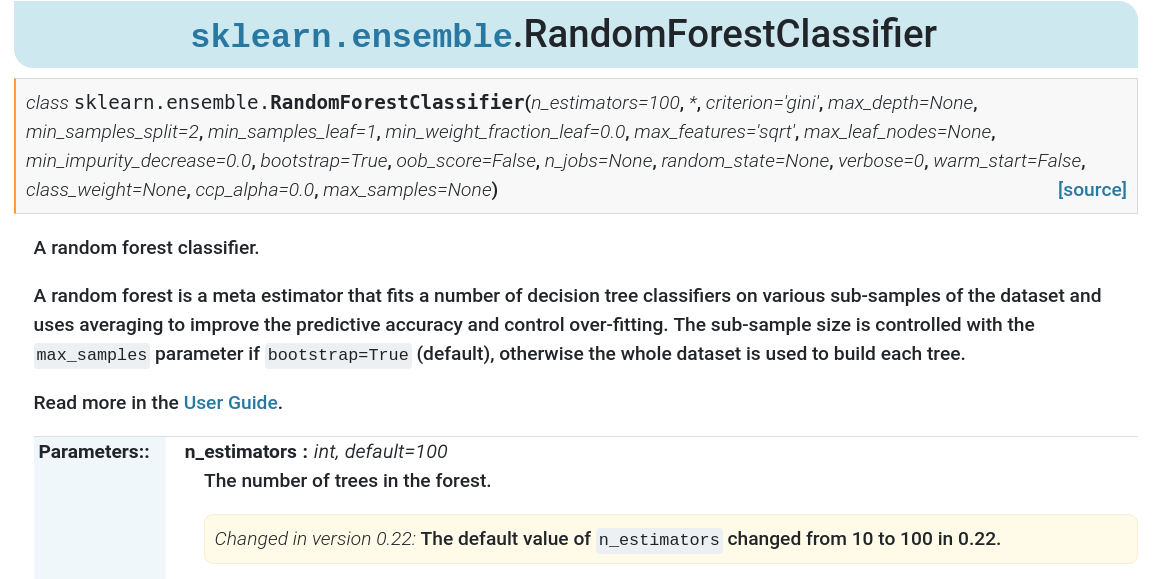

Esta cadena de texto puede contener lo que quieras, aunque su uso más común (prácticamente universal) es documentar.

Para crear una documentación en una función, módulo o clase debes escribir al **comienzo** de esta una cadena de texto.

Estos son algunos ejemplos:

### Documentando un módulo

Al comienzo de un fichero de python...

```python
"""
Este módulo contiene funciones de ejemplo. Esta ayuda
pertenece al módulo completo.

Se suele usar para explicar su contenido y conceptos
generales que se utilizan en él.
"""

def sumar(a, b):
    return a + b

def restar(a, b):
    return a - b
```

### Documentando una función, un método y una clase

```python
def multiplicar(a, b):
    """
    Esta función multiplica. 
    Ejemplo de docstring de una función
    """
    return a * b

class Perro:
    """
    Esta clase simula el comportamiento de un perro
    """
    def ladrar(self):
        """
        Este método simula el ladrido de un perro
        """
        print("¡Guau!")
        
```

Como véis sólo hay que añadir al comienzo de lo que se quiera documentar un string de triple entrecomillado

In [18]:
def multiplicar(a, b):
    """
    Esta función multiplica. 
    Ejemplo de docstring de una función
    """
    return a * b

Si se quiere acceder programáticamente a esta documentación podemos usar el atributo `__doc__`.

In [19]:
multiplicar.__doc__

'\n    Esta función multiplica. \n    Ejemplo de docstring de una función\n    '

No lo utilizaremos en general puesto que para acceder a la ayuda usaremos `help` o la sintáxis mágica `?` o `??` (sólo disponible en jupyter)

In [20]:
help(multiplicar)

Help on function multiplicar in module __main__:

multiplicar(a, b)
    Esta función multiplica. 
    Ejemplo de docstring de una función



In [21]:
multiplicar?

Signature: multiplicar(a, b)
Docstring:
Esta función multiplica. 
Ejemplo de docstring de una función
File:      /tmp/ipykernel_124175/3018240993.py
Type:      function


In [22]:
# La ventaja de ?? es que muestra todo el código para poder leerlo
multiplicar??

Signature: multiplicar(a, b)
Source:   
def multiplicar(a, b):
    """
    Esta función multiplica. 
    Ejemplo de docstring de una función
    """
    return a * b
File:      /tmp/ipykernel_124175/3018240993.py
Type:      function


### Documentando en detalle: parámetros y retorno

Es común especificar el significado de los parámetros de una función o método y su retorno (lo que devuelve).

Hay varias sintáxis para hacerlo siendo google, numpy y rest las más populares ([ver más detalle en esta respuesta de StackOverflow](https://stackoverflow.com/questions/3898572/what-are-the-most-common-python-docstring-formats))

In [23]:
# Este es un ejemplo usándo la sintáxis de Google:
def repetir(texto, n):
    """
    esta función repite `texto` `n` veces
    
        Parameters:
            texto: es el texto que se repite
            n: número de veces que se repite
            
        Returns:
            la repetición de la cadena de texto correspondiente
    """
    return texto * n

Las herramientas de documentación si están correctamente documentadas leerán esta sintáxis y añadirán esta información a la documentación.

En python estándar es muy popular reST (ver enlace anterior) porque está soportado directamente por las herramientas más populares de python.

El estilo NumPy y Google es más popular en modulos científicos o técnicos de python.

En cualquier caso es una cuestión de preferencias y estilo. Todas las sintáxis son adecuadas. Lo importante es documentar. 

**Siempre**

### Ejemplos en la documentación y [doctest](https://docs.python.org/3/library/doctest.html)

Hay una sintáxis especial que permite añadir a los docstrings ejemplos de la función que se está documentando.

Esta sintáxis tiene tres grandes ventajas:

- Ayuda a identificar al lector los ejemplos más fácilmente
- Los software de documentanción (p.e.: [`sphinx` ](https://www.sphinx-doc.org/en/master/), [`mkdocs`](https://www.mkdocs.org/)) identifican esta sintáxis y los incluyen de forma adecuada en la documentación
- Por último y quizá la más importante: los software de testing  como [`pytest`](https://docs.pytest.org/en/7.2.x/) (la más popular) y [`doctest`](https://docs.python.org/3/library/doctest.html). **Ejecutan estos ejemplos como tests para comprobar si todo funciona como debería**

Esto es un gran beneficio: además de mejorar la legibilidad y la documentación de nuestro código añadimos tests a este. Es algo muy recomendable.

_En mi opinión personal_, los doctest son muy adecuados para ejemplos sencillos o canónicos que sean buenos para entender el funcionamiento de la función. Los tests más complejos que queramos añadir a nuestro código no deberían estar en la documentación si no son fáciles de leer: el principal objetivo de la documentación (incluídos los `doctest`) es documentar, no *testar* el código. [(más información aquí)](https://realpython.com/python-doctest/)

In [24]:
# Veamos un ejemplo de doctest en uso:

def repetir(texto, n):
    """
    esta función repite `texto` `n` veces
    
        Parameters:
            texto: es el texto que se repite
            n: número de veces que se repite
            
        Returns:
            la repetición de la cadena de texto correspondiente
    
    >>> repetir("a", 3)
    "aaa"
    
    >>> repetir("", 5)
    ""
    
    """
    return texto * n

Para que veáis el funcionamiento usandolo como test voy a instalar `pytest` y ejecutarlo en un módulo con la función `repetir` usando `%writefile`

In [25]:
%%writefile repetir.py

def repetir(texto, n):
    """
    esta función repite `texto` `n` veces
    
        Parameters:
            texto: es el texto que se repite
            n: número de veces que se repite
            
        Returns:
            la repetición de la cadena de texto correspondiente
    
    >>> repetir("a", 3)
    'aaa'
    
    >>> repetir("", 5)
    ''
    
    """
    return texto * n

Overwriting repetir.py


In [26]:
# Ejecutar esta celda sin la almohadilla para instalar pytest:

# !pip install pytest

In [27]:
!pytest --doctest-modules -v repetir.py

============================= test session starts ==============================
platform linux -- Python 3.9.12, pytest-7.1.1, pluggy-1.0.0 -- /home/i/miniconda3/envs/py3k/bin/python
cachedir: .pytest_cache
rootdir: /home/i/Documents/teaching/UNIR/202223/apoyo_tecnicas_ia/sesion02
plugins: anyio-3.5.0
collected 1 item                                                               

repetir.py::repetir.repetir PASSED                                       [100%]

============================== 1 passed in 0.02s ===============================


Podemos ver que ha detectado los ejemplos y funcionan. Por último vamos a forzarlo para que haya un error y veamos que `pytest` funciona como debería.

**Añadiremos un último ejemplo que fallará puesto que el ejemplo es incorrecto**

In [28]:
%%writefile repetir.py

def repetir(texto, n):
    """
    esta función repite `texto` `n` veces
    
        Parameters:
            texto: es el texto que se repite
            n: número de veces que se repite
            
        Returns:
            la repetición de la cadena de texto correspondiente
    
    >>> repetir("a", 3)
    'aaa'
    
    >>> repetir("", 5)
    ''
    
    >>> repetir("fallo", 2)
    'fallo'
    
    """
    return texto * n

Overwriting repetir.py


In [29]:
!pytest --doctest-modules -v repetir.py

============================= test session starts ==============================
platform linux -- Python 3.9.12, pytest-7.1.1, pluggy-1.0.0 -- /home/i/miniconda3/envs/py3k/bin/python
cachedir: .pytest_cache
rootdir: /home/i/Documents/teaching/UNIR/202223/apoyo_tecnicas_ia/sesion02
plugins: anyio-3.5.0
collected 1 item                                                               

repetir.py::repetir.repetir FAILED                                       [100%]

=================================== FAILURES ===================================
__________________________ [doctest] repetir.repetir ___________________________
010         Returns:
011             la repetición de la cadena de texto correspondiente
012     
013     >>> repetir("a", 3)
014     'aaa'
015     
016     >>> repetir("", 5)
017     ''
018     
019     >>> repetir("fallo", 2)
Expected:
    'fallo'
Got:
    'fallofallo'

/home/i/Documents/teaching/UNIR/202223/apoyo_tecnicas_ia/sesion02/repetir.py:19: DocTestFailure
===

Podemos ver como `pytest` nos informa del error y lo que ha obtenido realmente (`'fallofallo'`).

## Tipado en python

Una forma de mejorar nuestro código de python es *tiparlo*. El tema de lenguaje tipado y no tipado es amplio y polémico. Se extiende más allá de los objetivos de esta clase. Pero quienes sean curiosos podéis leer más aquí [[1]](https://stackoverflow.com/questions/1517582/what-is-the-difference-between-statically-typed-and-dynamically-typed-languages) 
[[2]](https://www.quora.com/What-are-typed-language)
[[3]](https://www.techtarget.com/whatis/definition/strongly-typed)

De forma simplificada *tipar* es añadir qué tipos (int, str, Perro, ...) se usan en los parámetros y se devuelven en las variables. Para ello usaremos una sintáxis muy sencilla:

- Añadimos con `:` el tipo en los paŕametros: `(a: int, b: str)`
- Añadimos con `->` el tipo del retorno de la función: `def f(a) -> int`

Veamos un ejemplo:

In [30]:
def repetir(texto: str, n: int) -> str:
    """
    esta función repite `texto` `n` veces
    
        Parameters:
            texto: es el texto que se repite
            n: número de veces que se repite
            
        Returns:
            la repetición de la cadena de texto correspondiente
    
    >>> repetir("a", 3)
    'aaa'
    
    >>> repetir("", 5)
    ''
    
    """
    return texto * n

El tipado no tiene ningún efecto en el rendimiento del código. Es totalmente opcional. Pero nos servirá para:

- Hacer nuestro código más útil y legible: ahora el usuario conocerá el tipo de variables
- Usando un comprobador de tipos podemos detectar errores. Esto hará nuestro código más robusto. El más popular es [mypy](http://mypy-lang.org/)
- IDE (p.e.: VSCode) usarán esta información para mejorar el autocompletado de tu código y el de terceros.
- Permite "trucos" adicionales como el [overloading](https://adamj.eu/tech/2021/05/29/python-type-hints-how-to-use-overload/)

# Fuentes de datos

Hay muchísimas maneras de descargarse datos externos. Pero veremos dos muy populares en la comunidad de ciencia de datos:

###  sklearn.datasets

In [31]:
import sklearn.datasets

In [32]:
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

En sklearn encontraremos muchas funciones. Si comienzan por `load` o `fetch` las estaremos obteniendo externamente. Suelen ser datasets clásicos usados para la docencia o pequeñas pruebas aunque podemos encontrar de todo.

Por otro lado tenemos métodos que comienzan por `make` que generan dato sintético. No lo veremos en esta clase pero es útil para probar algoritmos distintos.

[Ver documentación oficial](https://scikit-learn.org/stable/datasets.html)

Usaremos una función muy importante: `fetch_openml`. Sirve para descargarse cualquier dataset que esté en el repositorio [OpenML](https://www.openml.org/search?type=data&sort=runs&status=active). Al momento de escribir este texto hay aproximadamente 5k datasets públicos.

Podemos usando el nombre y la versión obtener un pandas dataframe de estos datos:

In [33]:
X, y = sklearn.datasets.fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

In [34]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [35]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: category
Categories (2, object): ['0', '1']

## Descargarse un CSV de internet

Aunque hay muchos datasets que están en repositorios es común necesitar descargarse datasets de una URL (página web, enlance, ...). Para ello pandas nos proporciona en sus funciones `read_csv`, `read_excel`, ... una alternativa sencilla para acceder a ficheros a través de http:

In [36]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/mtcars.csv")

df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### Otras utilidades para la descarga de datos.

In [37]:
#pydataset es una librería especializada en la descarga de datos
from pydataset import data
data('titanic', show_doc=True)

titanic

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## titanic

### Description

The data is an observation-based version of the 1912 Titanic passenger
survival log,

### Usage

    data(titanic)

### Format

A data frame with 1316 observations on the following 4 variables.

`class`

a factor with levels `1st class` `2nd class` `3rd class` `crew`

`age`

a factor with levels `child` `adults`

`sex`

a factor with levels `women` `man`

`survived`

a factor with levels `no` `yes`

### Details

titanic is saved as a data frame. Used to assess risk ratios

### Source

Found in many other texts

### References

Hilbe, Joseph M (2014), Modeling Count Data, Cambridge University Press Hilbe,
Joseph M (2007, 2011), Negative Binomial Regression, Cambridge University
Press Hilbe, Joseph M (2009), Logistic Regression Models, Chapman & Hall/CRC

### Examples

    data(titanic)
    titanic$survival <- titanic$survived == "yes"
    glmlr <- glm(survival ~

In [38]:
data('titanic').head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


### Fuentes de datos de acceso abierto

A continuación otra pequeña muestra de fuentes de datos de acceso abierto: 
+ [Data Hub](https://datahub.io/collections). Agregador de fuentes públicas. Muy amplio, es un buen sitio para comenzar a explorar.
+ [Awesome Public Dataset](https://github.com/awesomedata/awesome-public-datasets). Repositorio colaborativo de fuentes públicas. Recomendado para comenzar a explorar.
+ [Kaggle](https://www.kaggle.com/datasets). Se creó para ayudar a las empresas a organizar concursos de ciencia de datos para resolver problemas complejos utilizando datos. 
+ [FiveThirtyEight](https://data.fivethirtyeight.com/). Datos de periodismo. Datos detras de las noticias de política, ciencia, cultura, deportes, entre otros. Principalmente contiene información de Estados Unidos.
+ [Banco Mundial](https://datos.bancomundial.org/). Información de diferentes paises y aspectos que buscan ayudar a mejorar la calidad de vida a través de los datos.
+ [Repositorio UCI ML](https://archive.ics.uci.edu/ml/datasets.php). El repositorio UCI Machine Learning alberga una colección de bases de datos y datasets que son utilizados por la comunidad para el análisis empírico de algoritmos de Machine Learning.Actualmente alberga más de 500 conjuntos de datos. Para citarlo: https://archive.ics.uci.edu/ml/citation_policy.html.
+ [Datos abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob).  Portal de Datos Abiertos dedicado a promover el acceso a los datos del gobierno municipal e impulsar el desarrollo de herramientas creativas para atraer y servir a la ciudadanía de Madrid. Al menos 500 Datasets.
+ [Datos abiertos del Gobierno de España](https://datos.gob.es/#slide-0). Mas de 50.000 conjuntos de datos de Gobernabilidad, Sector público, demografía, ciencia y tecnología, deportes, salud y bienestar, medio ambiente, legislación, entre otros. Busca promocionar la apertura de la información pública y el desarrollo de servicios avanzados basados en datos. Es promovida por el Ministerio de Asuntos Económicos y Transformación Digital y la Entidad Pública Empresarial Red.es.
+ [Portal de Datos Abiertos de Esri España](https://opendata.esri.es/). Ofrece datos tratados por Esri España y también es una recopilación de los diferentes portales Open Data desarrollados con tecnología Esri existentes en la actualidad. La tecnología de Esri permite poner a disposición de los usuarios tecnología espacial basada en mapas interactivos que capacitan a los profesionales de información para la toma de decisiones estratégicas. Encuentras datasets de salud, ciencia, sociodemográficos, comercio, empresa y negocios, educación, economía, transporte, entre otros.
+ [Repositorio de datos del Gobierno de Navarra](https://gobiernoabierto.navarra.es/es/open-data/que-es-open-data/open-data-espana). Presenta un repositorio de las diferentes entidades públicas que permiten el acceso abierto a datasets de ambito nacional, comunidades autonómicas, diputaciones y entidades locales.

# Referencias

## Funciones mágicas

 - https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html Capítulo de Python Data Science Handbook dedicado a los magic command (libro muy recomendado)
 - https://ipython.readthedocs.io/en/stable/interactive/magics.html listado de todos los magic preinstalados

## Documentación

 - https://peps.python.org/pep-0257/ PEP que describe los docstrings
 - https://wiki.python.org/moin/DocumentationTools Página de documentación de la wiki oficial de python (no muy actualizada)

### Herramientas para documentas
 - https://www.sphinx-doc.org/en/master/ Herramienta más popular de documentación pero muy compleja de configurar. No la recomiendo para iniciados.
 - https://www.mkdocs.org/ Más fácil que usar que sphinx pero menos popular y flexible
 - https://pdoc.dev/ **Recomendada**. Muy sencilla de usar
 - https://timothycrosley.github.io/portray/ Recomendada. Muy sencilla de usar. Menos popular pero es más amplia que la anterior
 - https://medium.com/@peterkong/comparison-of-python-documentation-generators-660203ca3804 Comparativa de herramientas
  
## Testing

 - **https://docs.pytest.org/** librería muy popular y fundamental para el testing en python. Soporta doctest
 - https://docs.python.org/3/library/doctest.html Módulo oficial de python para encontra y ejecutar doctest
 - https://realpython.com/python-testing/ Guía introductoria al testing: no sólo doctest sino test en general.